In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('marks.csv',header=None, names=['name','subject','marks']) 

In [3]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     10 non-null     object 
 1   subject  9 non-null      object 
 2   marks    9 non-null      float64
dtypes: float64(1), object(2)
memory usage: 368.0+ bytes


In [5]:
df.columns

Index(['name', 'subject', 'marks'], dtype='object')

In [6]:
df.size

30

In [7]:
df.shape

(10, 3)

In [8]:
df.values

array([['Bill', 'Java', 90.0],
       ['Bill', 'Python', 95.0],
       ['Steve', 'Java', 80.0],
       ['Steve', 'C', 90.0],
       ['Roberts', 'HTML', 98.0],
       ['Roberts', 'Java', 60.0],
       ['Roberts', 'Python', 70.0],
       ['Steve', 'Python', nan],
       ['Henry', nan, 60.0],
       ['Steve', 'Python', 94.0]], dtype=object)

In [9]:
df.describe()  # Considers only numeric cols 

,marks
count,9.000000
mean,81.888889
std,15.053608
min,60.000000
25%,70.000000
50%,90.000000
75%,94.000000
max,98.000000


In [3]:
df.shape

(10, 3)

In [10]:
df.describe(include='all')    # Include all columns 

,name,subject,marks
count,10,9,9.000000
unique,4,4,NaN
top,Steve,Python,NaN
freq,4,4,NaN
mean,NaN,NaN,81.888889
std,NaN,NaN,15.053608
min,NaN,NaN,60.000000
25%,NaN,NaN,70.000000
50%,NaN,NaN,90.000000
75%,NaN,NaN,94.000000


In [7]:
df.axes

[RangeIndex(start=0, stop=10, step=1),
 Index(['name', 'subject', 'marks'], dtype='object')]

### Retrieving data 

In [11]:
df.subject   # dj['subject']

0      Java
1    Python
2      Java
3         C
4      HTML
5      Java
6    Python
7    Python
8       NaN
9    Python
Name: subject, dtype: object

In [24]:
df[['name','marks']]  # Col names

,name,marks
0,Bill,90.0
1,Bill,95.0
2,Steve,80.0
3,Steve,90.0
4,Roberts,98.0
5,Roberts,60.0
6,Roberts,70.0
7,Steve,NaN
8,Henry,60.0
9,Steve,94.0


In [12]:
df[3:7]   # slicing by row index 

,name,subject,marks
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0


In [11]:
#df[3]  # column name  

### at, iat, loc, iloc attributes 

In [13]:
# at and iat do not support slicing 
print(df.at[0,'marks'])   # Row label and col label
print(df.iat[0,2])        # Row pos and col pos 

90.0
90.0


In [27]:
df.marks > 80

0     True
1     True
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9     True
Name: marks, dtype: bool

In [14]:
df[df.marks > 80]   # Boolean indexing

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
9,Steve,Python,94.0


In [29]:
df[df.marks > 80].marks

0    90.0
1    95.0
3    90.0
4    98.0
9    94.0
Name: marks, dtype: float64

In [32]:
df[df.subject == 'Python']

,name,subject,marks
1,Bill,Python,95.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
9,Steve,Python,94.0


In [9]:
df[df.marks > 80][['name','marks']]

,name,marks
0,Bill,90.0
1,Bill,95.0
3,Steve,90.0
4,Roberts,98.0
9,Steve,94.0


#### loc and iloc

In [30]:
df.loc[8,'name']

'Henry'

In [31]:
df.loc[df.marks > 80, ['name','marks']]

,name,marks
0,Bill,90.0
1,Bill,95.0
3,Steve,90.0
4,Roberts,98.0
9,Steve,94.0


In [33]:
df.loc[ : 8, : 'subject']  # Rows upto row-label 8, Cols upto subject

,name,subject
0,Bill,Java
1,Bill,Python
2,Steve,Java
3,Steve,C
4,Roberts,HTML
5,Roberts,Java
6,Roberts,Python
7,Steve,Python
8,Henry,NaN


In [11]:
(df.subject == 'Python') & (df.marks > 80)

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool

In [34]:
df[(df.subject == 'Python') & (df.marks > 80)]   # & is logical And, Paranetheses must

,name,subject,marks
1,Bill,Python,95.0
9,Steve,Python,94.0


In [15]:
df.loc[1:5, 'name': 'marks']

,name,subject,marks
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0


In [26]:
df.loc[ df.marks > 60, 'subject':]

,subject,marks
0,Java,90.0
1,Python,95.0
2,Java,80.0
3,C,90.0
4,HTML,98.0
6,Python,70.0
9,Python,94.0


In [8]:
df.iloc[0:2,0:2]

,name,subject
0,Bill,Java
1,Bill,Python


### sample, isin, where, filter  methods

In [17]:
df.sample(3)

,name,subject,marks
0,Bill,Java,90.0
4,Roberts,HTML,98.0
7,Steve,Python,NaN


In [18]:
df.subject.isin(['Python','Java'])

0     True
1     True
2     True
3    False
4    False
5     True
6     True
7     True
8    False
9     True
Name: subject, dtype: bool

In [19]:
# get rows related to python and java
df[df.subject.isin(['Python','Java'])]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
9,Steve,Python,94.0


In [14]:
df.where(df.marks > 80)

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,NaN,NaN,NaN
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,Steve,Python,94.0


In [20]:
df.filter(regex='e$')  # select columns where column name ends with letter e

,name
0,Bill
1,Bill
2,Steve
3,Steve
4,Roberts
5,Roberts
6,Roberts
7,Steve
8,Henry
9,Steve


In [22]:
df.filter(regex='6', axis=0)  # Filter by row labels 

,name,subject,marks
6,Roberts,Python,70.0


### Operations on columns

In [21]:
df['marks'] - 50

0    40.0
1    45.0
2    30.0
3    40.0
4    48.0
5    10.0
6    20.0
7     NaN
8    10.0
9    44.0
Name: marks, dtype: float64

### nlargest, nsmallest

In [22]:
df.nlargest(4,'marks')   # Keep=first 

,name,subject,marks
4,Roberts,HTML,98.0
1,Bill,Python,95.0
9,Steve,Python,94.0
0,Bill,Java,90.0


In [23]:
df.nlargest(4,'marks', keep='all')

,name,subject,marks
4,Roberts,HTML,98.0
1,Bill,Python,95.0
9,Steve,Python,94.0
0,Bill,Java,90.0
3,Steve,C,90.0


In [24]:
df[['name','subject']].drop_duplicates()

,name,subject
0,Bill,Java
1,Bill,Python
2,Steve,Java
3,Steve,C
4,Roberts,HTML
5,Roberts,Java
6,Roberts,Python
7,Steve,Python
8,Henry,NaN


In [14]:
df['name'].drop_duplicates()
#df['name'].unique()

0       Bill
2      Steve
4    Roberts
8      Henry
Name: name, dtype: object

In [25]:
df.subject.drop_duplicates()

0      Java
1    Python
3         C
4      HTML
8       NaN
Name: subject, dtype: object

In [26]:
df.subject.dropna().unique()

array(['Java', 'Python', 'C', 'HTML'], dtype=object)

#### apply() and applymap()

In [27]:
# s is a series 
def count_nulls(s):
    return s.isnull().sum()

In [28]:
df.apply(count_nulls)  # passes one col as series 

name       0
subject    1
marks      1
dtype: int64

In [43]:
df.apply(lambda s : s.notnull().sum())   # Apply operation on each column

name       10
subject     9
marks       9
dtype: int64

In [6]:
df.apply(lambda s : s.notnull().sum(), axis=1)   # Apply operation on each row 

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    2
8    2
9    3
dtype: int64

In [17]:
type(df[['name']]), type(df.name)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [18]:
df[['name','subject']].apply(lambda s: s.isnull().sum())

name       0
subject    1
dtype: int64

In [17]:
# df[['name','subject']].applymap(lambda v : str(v).upper())

In [33]:
def convert_upper(v):
    if isinstance(v,str):
        return v.strip().upper()
    else:
        return v

In [30]:
df.applymap(lambda v : str(v).upper())

,name,subject,marks
0,BILL,JAVA,90.0
1,BILL,PYTHON,95.0
2,STEVE,JAVA,80.0
3,STEVE,C,90.0
4,ROBERTS,HTML,98.0
5,ROBERTS,JAVA,60.0
6,ROBERTS,PYTHON,70.0
7,STEVE,PYTHON,NAN
8,HENRY,NAN,60.0
9,STEVE,PYTHON,94.0


In [35]:
df.applymap(convert_upper)

,name,subject,marks
0,BILL,JAVA,90.0
1,BILL,PYTHON,95.0
2,STEVE,JAVA,80.0
3,STEVE,C,90.0
4,ROBERTS,HTML,98.0
5,ROBERTS,JAVA,60.0
6,ROBERTS,PYTHON,70.0
7,STEVE,PYTHON,NaN
8,HENRY,NaN,60.0
9,STEVE,PYTHON,94.0


In [34]:
df[['name','subject']].applymap(convert_upper)

,name,subject
0,BILL,JAVA
1,BILL,PYTHON
2,STEVE,JAVA
3,STEVE,C
4,ROBERTS,HTML
5,ROBERTS,JAVA
6,ROBERTS,PYTHON
7,STEVE,PYTHON
8,HENRY,NaN
9,STEVE,PYTHON


In [40]:
type(df.loc[8,'subject']), type(None)

(float, NoneType)

In [36]:
df[['name','subject']].applymap(lambda v : v.upper() if isinstance(v,str) else 'NULL')

,name,subject
0,BILL,JAVA
1,BILL,PYTHON
2,STEVE,JAVA
3,STEVE,C
4,ROBERTS,HTML
5,ROBERTS,JAVA
6,ROBERTS,PYTHON
7,STEVE,PYTHON
8,HENRY,NULL
9,STEVE,PYTHON


### Attribute str

In [42]:
df.name.upper() 

AttributeError: 'Series' object has no attribute 'upper'

In [29]:
# df.name.upper()   --> Doesn't work as df.name is a Series 
# df.subject.apply(str.upper)   # Throws errors if you have NaN values
#df.name.apply(lambda v : v[:2])

In [48]:
df.name.str.upper()

0       BILL
1       BILL
2      STEVE
3      STEVE
4    ROBERTS
5    ROBERTS
6    ROBERTS
7      STEVE
8      HENRY
9      STEVE
Name: name, dtype: object

In [15]:
df.name.str.count('e')

0    0
1    0
2    2
3    2
4    1
5    1
6    1
7    2
8    1
9    2
Name: name, dtype: int64

In [5]:
df [ df.name.str.startswith('S')]     

,name,subject,marks
2,Steve,Java,80.0
3,Steve,C,90.0
7,Steve,Python,NaN
9,Steve,Python,94.0


In [23]:
df[ (df.name.str.len() == 4) |  (df.name.str.len() == 5)]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [49]:
df.name.str.findall('[A-Za-z]{2}')   # Find matches to RE

0        [Bi, ll]
1        [Bi, ll]
2        [St, ev]
3        [St, ev]
4    [Ro, be, rt]
5    [Ro, be, rt]
6    [Ro, be, rt]
7        [St, ev]
8        [He, nr]
9        [St, ev]
Name: name, dtype: object

In [17]:
df.name.str.extract('([A-Z+])([a-z]+)')   # Grouping in RE

,0,1
0,B,ill
1,B,ill
2,S,teve
3,S,teve
4,R,oberts
5,R,oberts
6,R,oberts
7,S,teve
8,H,enry
9,S,teve


### Adding rows 

In [43]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [46]:
df = df.append({'name':'Mark','subject':'Java', 'marks':90, 'x' : 10}, ignore_index=True)

C:\Users\srika\AppData\Local\Temp\ipykernel_18792\3614325112.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'name':'Mark','subject':'Java', 'marks':90, 'x' : 10}, ignore_index=True)


In [47]:
df

,name,subject,marks,x
0,Bill,Java,90.0,NaN
1,Bill,Python,95.0,NaN
2,Steve,Java,80.0,NaN
3,Steve,C,90.0,NaN
4,Roberts,HTML,98.0,NaN
5,Roberts,Java,60.0,NaN
6,Roberts,Python,70.0,NaN
7,Steve,Python,NaN,NaN
8,Henry,NaN,60.0,NaN
9,Steve,Python,94.0,NaN


In [51]:
df.drop(['x'],axis=1, inplace=True)    # Dropping columns 

In [52]:
df.loc[12] = ['Mark','Python',88] # Changes existing row or adds new row 

In [53]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [54]:
df.loc[10] = ['Mark','C',95]   # Replace what is in 10th index 

In [55]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [54]:
df.loc[13] = ['Ben','Python',np.NaN]  

In [55]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [56]:
df.loc[13, 'marks'] = 87

In [27]:
df.index.is_unique

True

### Adding columns

In [56]:
df['passmark'] = 50

In [57]:
df.head()

,name,subject,marks,passmark
0,Bill,Java,90.0,50
1,Bill,Python,95.0,50
2,Steve,Java,80.0,50
3,Steve,C,90.0,50
4,Roberts,HTML,98.0,50


In [58]:
df.loc[ df.subject == 'Python', 'passmark'] = 70  # Change passmark for Python

In [59]:
df

,name,subject,marks,passmark
0,Bill,Java,90.0,50
1,Bill,Python,95.0,70
2,Steve,Java,80.0,50
3,Steve,C,90.0,50
4,Roberts,HTML,98.0,50
5,Roberts,Java,60.0,50
6,Roberts,Python,70.0,70
7,Steve,Python,NaN,70
8,Henry,NaN,60.0,50
9,Steve,Python,94.0,70


In [60]:
df.loc[12, 'marks'] = 40

In [61]:
df [df.marks < df.passmark]

,name,subject,marks,passmark
12,Mark,Python,40.0,70


In [62]:
def get_grade(m):
    if m > 90:
        return 'A'
    elif m > 80:
        return 'B'
    else:
        return 'C'

In [63]:
grades = df.marks.apply(get_grade)
type(grades)

pandas.core.series.Series

In [64]:
df['grade'] = grades     # New column with values from Series

In [66]:
df.head()

,name,subject,marks,passmark,grade
0,Bill,Java,90.0,50,B
1,Bill,Python,95.0,70,A
2,Steve,Java,80.0,50,C
3,Steve,C,90.0,50,B
4,Roberts,HTML,98.0,50,A


In [66]:
df['passed'] = df.marks >= df.passmark

In [68]:
df

,name,subject,marks,passmark,grade
0,Bill,Java,90.0,50,B
1,Bill,Python,95.0,70,A
2,Steve,Java,80.0,50,C
3,Steve,C,90.0,50,B
4,Roberts,HTML,98.0,50,A
5,Roberts,Java,60.0,50,C
6,Roberts,Python,70.0,70,C
7,Steve,Python,NaN,70,C
8,Henry,NaN,60.0,50,C
9,Steve,Python,94.0,70,A


In [41]:
df.grade.value_counts(ascending=True)

A    4
B    4
C    6
Name: grade, dtype: int64

### Dropping rows and columns 

In [69]:
# df.drop([11,13])  # Return a new df and doesn't modify existing df 
df.drop([12,11], inplace=True, axis=0)  # Drop rows with indexes 12 and 13

In [70]:
df.drop([20])    # axis = 0 means row label 

KeyError: '[20] not found in axis'

In [71]:
df[df.subject == 'Python'].index

Int64Index([1, 6, 7, 9], dtype='int64')

In [72]:
df.drop( df[df.subject == 'Python'].index )

,name,subject,marks,passmark,grade
0,Bill,Java,90.0,50,B
2,Steve,Java,80.0,50,C
3,Steve,C,90.0,50,B
4,Roberts,HTML,98.0,50,A
5,Roberts,Java,60.0,50,C
8,Henry,NaN,60.0,50,C
10,Mark,C,95.0,50,A


In [73]:
pd.__version__

'1.5.3'

In [74]:
df.drop(columns=['marks']) 
#df.drop(['grade'],axis=1)    # Dropping columns 

,name,subject,passmark,grade
0,Bill,Java,50,B
1,Bill,Python,70,A
2,Steve,Java,50,C
3,Steve,C,50,B
4,Roberts,HTML,50,A
5,Roberts,Java,50,C
6,Roberts,Python,70,C
7,Steve,Python,70,C
8,Henry,NaN,50,C
9,Steve,Python,70,A


#### Drop rows where subject is Java 

In [72]:
indices = df[df.subject == 'Java'].index

In [73]:
indices

Int64Index([0, 2, 5, 10], dtype='int64')

In [74]:
# df.drop(indices, axis = 0)
df.drop(index = indices)

,name,subject,marks,passmark,passed,grade
1,Bill,Python,95.0,70,True,A
3,Steve,C,90.0,50,True,B
4,Roberts,HTML,98.0,50,True,A
6,Roberts,Python,70.0,70,True,C
7,Steve,Python,NaN,70,False,C
8,Henry,NaN,60.0,50,True,C
9,Steve,Python,94.0,70,True,A


### Reshaping Data

In [75]:
df.dropna().sort_values(by  = 'marks')

,name,subject,marks,passmark,grade
5,Roberts,Java,60.0,50,C
6,Roberts,Python,70.0,70,C
2,Steve,Java,80.0,50,C
0,Bill,Java,90.0,50,B
3,Steve,C,90.0,50,B
9,Steve,Python,94.0,70,A
1,Bill,Python,95.0,70,A
10,Mark,C,95.0,50,A
4,Roberts,HTML,98.0,50,A


In [76]:
df.sort_values(by=['subject','marks'],ascending=[True,False])  # Sort first by subject then by marks desc

,name,subject,marks,passmark,grade
10,Mark,C,95.0,50,A
3,Steve,C,90.0,50,B
4,Roberts,HTML,98.0,50,A
0,Bill,Java,90.0,50,B
2,Steve,Java,80.0,50,C
5,Roberts,Java,60.0,50,C
1,Bill,Python,95.0,70,A
9,Steve,Python,94.0,70,A
6,Roberts,Python,70.0,70,C
7,Steve,Python,NaN,70,C


In [77]:
students = pd.DataFrame( {'rollno' : np.arange(1,11), 'name' : ['name' + str(i) for i in range(1,11)]})

In [78]:
students

,rollno,name
0,1,name1
1,2,name2
2,3,name3
3,4,name4
4,5,name5
5,6,name6
6,7,name7
7,8,name8
8,9,name9
9,10,name10


In [79]:
students.sort_index(ascending=False)

,rollno,name
9,10,name10
8,9,name9
7,8,name8
6,7,name7
5,6,name6
4,5,name5
3,4,name4
2,3,name3
1,2,name2
0,1,name1


In [80]:
stud_df = students.set_index('rollno')

In [81]:
stud_df

,name
rollno,
1,name1
2,name2
3,name3
4,name4
5,name5
6,name6
7,name7
8,name8
9,name9


In [82]:
stud_df.reset_index()

,rollno,name
0,1,name1
1,2,name2
2,3,name3
3,4,name4
4,5,name5
5,6,name6
6,7,name7
7,8,name8
8,9,name9
9,10,name10


In [83]:
stud_df.reset_index(drop=True) # Drops existing custom index 

,name
0,name1
1,name2
2,name3
3,name4
4,name5
5,name6
6,name7
7,name8
8,name9
9,name10


In [84]:
students.rename( columns = {'rollno': 'admno','name' : 'fullname'})   # rename col labels 

,admno,fullname
0,1,name1
1,2,name2
2,3,name3
3,4,name4
4,5,name5
5,6,name6
6,7,name7
7,8,name8
8,9,name9
9,10,name10


In [8]:
students.columns

Index(['rollno', 'name'], dtype='object')

In [84]:
stud_df = students.rename(index = {0:11, 1:11})   # rename row index

In [85]:
stud_df.head()

,rollno,name
11,1,name1
11,2,name2
2,3,name3
3,4,name4
4,5,name5


In [86]:
students.columns

Index(['rollno', 'name'], dtype='object')

In [64]:
students.columns = ['id','firstname']   # Changes all column names 

In [65]:
students

,id,firstname
0,1,name1
1,2,name2
2,3,name3
3,4,name4
4,5,name5
5,6,name6
6,7,name7
7,8,name8
8,9,name9
9,10,name10


### Concatenation, Joining 

In [87]:
df1 = pd.DataFrame( ((1,2,3),(4,5,6)), columns=list('abc'))
df2 = pd.DataFrame( ((10,11,12),(13,14,15)), columns=list('abc'))

In [88]:
print(df1)
print(df2)

   a  b  c
0  1  2  3
1  4  5  6
    a   b   c
0  10  11  12
1  13  14  15


In [92]:
pd.concat((df1,df2), ignore_index=True)  # Generate new index 

,a,b,c
0,1,2,3
1,4,5,6
2,10,11,12
3,13,14,15


In [93]:
pd.concat((df1,df2))

,a,b,c
0,1,2,3
1,4,5,6
0,10,11,12
1,13,14,15


In [89]:
df1 = pd.DataFrame( ((1,2,3),(4,5,6)), columns=list('abc'), index=(1,2))
df2 = pd.DataFrame( ((1,2,3),(4,5,6)), columns=list('xyz'), index=(10,2))

In [97]:
df1

,a,b,c
1,1,2,3
2,4,5,6


In [98]:
df2

,x,y,z
10,1,2,3
2,4,5,6


In [90]:
pd.concat((df1,df2), axis=1)  # Join based on row index - outer join

,a,b,c,x,y,z
1,1.0,2.0,3.0,NaN,NaN,NaN
2,4.0,5.0,6.0,4.0,5.0,6.0
10,NaN,NaN,NaN,1.0,2.0,3.0


In [10]:
pd.concat((df1,df2))

,a,b,c,x,y,z
1,1.0,2.0,3.0,NaN,NaN,NaN
2,4.0,5.0,6.0,NaN,NaN,NaN
10,NaN,NaN,NaN,1.0,2.0,3.0
2,NaN,NaN,NaN,4.0,5.0,6.0


In [100]:
pd.concat((df1,df2), axis=1, join='inner')

,a,b,c,x,y,z
2,4,5,6,4,5,6


In [91]:
df1 = pd.DataFrame ( {'name' : ['A','B','C'], 'age' : [25,20,26]})
df2 = pd.DataFrame ( {'name' : ['A','B','D'], 'gender' : ['M','F','F']})

In [92]:
df1

,name,age
0,A,25
1,B,20
2,C,26


In [14]:
df2

,name,gender
0,A,M
1,B,F
2,D,F


In [93]:
pd.concat((df1,df2), axis=1)

,name,age,name,gender
0,A,25,A,M
1,B,20,B,F
2,C,26,D,F


In [94]:
df1.merge(df2)  # Merge based on common column - name  (inner join)

,name,age,gender
0,A,25,M
1,B,20,F


In [95]:
df1.merge(df2, how='outer')   # Outer join

,name,age,gender
0,A,25.0,M
1,B,20.0,F
2,C,26.0,NaN
3,D,NaN,F


In [13]:
df1.merge(df2, left_index=True, right_index=True)  # Merge based on left and right indexes

,name_x,age,name_y,gender
0,A,25,A,M
1,B,20,B,F
2,C,26,D,F


In [15]:
df1 = pd.DataFrame ( {'name' : ['A','B','C'], 'age' : [25,20,26]})
df2 = pd.DataFrame ( {'firstname' : ['A','B','D'], 'gender' : ['M','F','F']})

In [16]:
# When col names are not same use left_on and right_on
df1.merge(df2, left_on='name', right_on='firstname', how = 'outer') 

,name,age,firstname,gender
0,A,25.0,A,M
1,B,20.0,B,F
2,C,26.0,NaN,NaN
3,NaN,NaN,D,F


## Grouping data 

In [96]:
df = pd.read_csv('marks.csv',header=None, names=['name','subject','marks'])

In [97]:
subgroup = df.groupby('subject')
print(type(subgroup))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [108]:
submean = subgroup.mean()

In [21]:
type(submean)

pandas.core.frame.DataFrame

In [109]:
submean

,marks
subject,
C,90.000000
HTML,98.000000
Java,76.666667
Python,86.333333


In [24]:
submean.loc['Python',:]

marks    86.333333
Name: Python, dtype: float64

In [110]:
subgroup.max()

,name,marks
subject,,
C,Steve,90.0
HTML,Roberts,98.0
Java,Steve,90.0
Python,Steve,95.0


In [26]:
subgroup['marks'].max()

subject
C         90.0
HTML      98.0
Java      90.0
Python    95.0
Name: marks, dtype: float64

In [98]:
df.groupby('subject')['marks'].aggregate(['mean','sum','max','min'])

,mean,sum,max,min
subject,,,,
C,90.000000,90.0,90.0,90.0
HTML,98.000000,98.0,98.0,98.0
Java,76.666667,230.0,90.0,60.0
Python,86.333333,259.0,95.0,70.0


In [100]:
subgroups = df.groupby(['subject'])

In [101]:
subgroups.groups

{'C': [3], 'HTML': [4], 'Java': [0, 2, 5], 'Python': [1, 6, 7, 9]}

In [102]:
java = subgroups.get_group('Java')
print(java)

      name subject  marks
0     Bill    Java   90.0
2    Steve    Java   80.0
5  Roberts    Java   60.0


In [115]:
for g in subgroups.groups:
    print(g)
    print(subgroups.get_group(g))

C
    name subject  marks
3  Steve       C   90.0
HTML
      name subject  marks
4  Roberts    HTML   98.0
Java
      name subject  marks
0     Bill    Java   90.0
2    Steve    Java   80.0
5  Roberts    Java   60.0
Python
      name subject  marks
1     Bill  Python   95.0
6  Roberts  Python   70.0
7    Steve  Python    NaN
9    Steve  Python   94.0


In [116]:
name_g = df.groupby('name')['marks'].sum()
print(name_g)

name
Bill       185.0
Henry       60.0
Roberts    228.0
Steve      264.0
Name: marks, dtype: float64


In [33]:
name_g = df.groupby('name', as_index = False)['marks'].sum()
print(name_g)

      name  marks
0     Bill  185.0
1    Henry   60.0
2  Roberts  228.0
3    Steve  264.0


In [34]:
name_g.nlargest(2,'marks')

,name,marks
3,Steve,264.0
2,Roberts,228.0


In [22]:
sub_g = df.groupby('subject')
for g in sub_g.groups:
    print(sub_g.get_group(g).nlargest(2,'marks'))
    # print(sub_g.get_group(g).sort_values('marks', ascending =False)[:2])

    name subject  marks
3  Steve       C   90.0
      name subject  marks
4  Roberts    HTML   98.0
    name subject  marks
0   Bill    Java   90.0
2  Steve    Java   80.0
    name subject  marks
1   Bill  Python   95.0
9  Steve  Python   94.0


In [117]:
df.groupby('name')['marks'].mean()

name
Bill       92.5
Henry      60.0
Roberts    76.0
Steve      88.0
Name: marks, dtype: float64

### Handling Null values 

In [118]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [119]:
df.dropna()   # drops rows with one or more null values

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
9,Steve,Python,94.0


In [120]:
df.dropna(axis=1)  # Drop columns with one or more null values

,name
0,Bill
1,Bill
2,Steve
3,Steve
4,Roberts
5,Roberts
6,Roberts
7,Steve
8,Henry
9,Steve


In [121]:
df.dropna(how='all')  # Drops if rows that have null values in all columns

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [38]:
df.fillna(0)

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,0.0
8,Henry,0,60.0
9,Steve,Python,94.0


In [6]:
df.fillna(method="ffill")  # Forward fill 

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,70.0
8,Henry,Python,60.0
9,Steve,Python,94.0


In [39]:
df.fillna({'subject': "unknown", 'marks' : 0})

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,0.0
8,Henry,unknown,60.0
9,Steve,Python,94.0


In [23]:
df.fillna({'marks' : df['marks'].mean()})

,name,subject,marks
0,Bill,Java,90.000000
1,Bill,Python,95.000000
2,Steve,Java,80.000000
3,Steve,C,90.000000
4,Roberts,HTML,98.000000
5,Roberts,Java,60.000000
6,Roberts,Python,70.000000
7,Steve,Python,81.888889
8,Henry,NaN,60.000000
9,Steve,Python,94.000000


In [7]:
df.isna()

,name,subject,marks
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,True
8,False,True,False
9,False,False,False


In [9]:
df.isna().any()

name       False
subject     True
marks       True
dtype: bool

In [11]:
df.isna().any(axis=1)   # True if row contains atleast one na value

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
9    False
dtype: bool

In [12]:
df.isna().all(axis = 1)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [10]:
df.isna().sum()

name       0
subject    1
marks      1
dtype: int64

In [9]:
df[df.isna().any(axis=1)]  # Select rows that contain one or more null values 

,name,subject,marks
7,Steve,Python,NaN
8,Henry,NaN,60.0


In [107]:
df.loc [:, [False, True, True]]  # Boolean index for columns 

,subject,marks
0,Java,90.0
1,Python,95.0
2,Java,80.0
3,C,90.0
4,HTML,98.0
5,Java,60.0
6,Python,70.0
7,Python,NaN
8,NaN,60.0
9,Python,94.0


In [108]:
df.isna().any()

name       False
subject     True
marks       True
dtype: bool

In [14]:
df.loc[:,df.isna().any()]    # Display columns that have null values 

,subject,marks
0,Java,90.0
1,Python,95.0
2,Java,80.0
3,C,90.0
4,HTML,98.0
5,Java,60.0
6,Python,70.0
7,Python,NaN
8,NaN,60.0
9,Python,94.0


In [15]:
df.loc[:,df.notna().all()]    # Display columns that have no null values 

,name
0,Bill
1,Bill
2,Steve
3,Steve
4,Roberts
5,Roberts
6,Roberts
7,Steve
8,Henry
9,Steve


In [10]:
df[['name','subject']].duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool

In [23]:
print(df.subject)
df.subject.duplicated()

0      Java
1    Python
2      Java
3         C
4      HTML
5      Java
6    Python
7    Python
8       NaN
9    Python
Name: subject, dtype: object


0    False
1    False
2     True
3    False
4    False
5     True
6     True
7     True
8    False
9     True
Name: subject, dtype: bool

In [13]:
df['subject'].nunique()

4

In [14]:
df.subject.unique()

array(['Java', 'Python', 'C', 'HTML', nan], dtype=object)

In [17]:
df.subject.dropna().unique()

array(['Java', 'Python', 'C', 'HTML'], dtype=object)

In [11]:
df.replace('Python','P')

,name,subject,marks
0,Bill,Java,90.0
1,Bill,P,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,P,70.0
7,Steve,P,NaN
8,Henry,NaN,60.0
9,Steve,P,94.0


In [12]:
df.fillna({'subject': 'C'}).replace(['Python','Java','HTML','C'],[1,2,3,4])  # Encoding 

,name,subject,marks
0,Bill,2,90.0
1,Bill,1,95.0
2,Steve,2,80.0
3,Steve,4,90.0
4,Roberts,3,98.0
5,Roberts,2,60.0
6,Roberts,1,70.0
7,Steve,1,NaN
8,Henry,4,60.0
9,Steve,1,94.0


In [20]:
 # Encoding # Subject becomes float as it has null value
df.replace(['Python','Java','HTML','C'],[1,2,3,4]) 

,name,subject,marks
0,Bill,2.0,90.0
1,Bill,1.0,95.0
2,Steve,2.0,80.0
3,Steve,4.0,90.0
4,Roberts,3.0,98.0
5,Roberts,2.0,60.0
6,Roberts,1.0,70.0
7,Steve,1.0,NaN
8,Henry,NaN,60.0
9,Steve,1.0,94.0


In [27]:
df.marks

0    90.0
1    95.0
2    80.0
3    90.0
4    98.0
5    60.0
6    70.0
7     NaN
8    60.0
9    94.0
Name: marks, dtype: float64

In [110]:
#df.marks.astype('int32')

In [123]:
df['marks'].fillna(0).astype('int32')

0    90
1    95
2    80
3    90
4    98
5    60
6    70
7     0
8    60
9    94
Name: marks, dtype: int32

In [34]:
df2 = df.dropna()

In [35]:
df2

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
9,Steve,Python,94.0


In [36]:
df2['marks'].astype('int32')

0    90
1    95
2    80
3    90
4    98
5    60
6    70
9    94
Name: marks, dtype: int32

### Write data frame

In [111]:
df.to_json("marks.json")   # Col-wise

In [112]:
df.to_json("marks.json", orient="records")   # row-wise 

In [113]:
df.loc[ df.subject == 'Python',['name','marks']].to_csv("python_marks.csv",index=False,header=False)

In [9]:
df.fillna({'marks' : -1}).to_csv("final_marks.csv", index=False)

### binning 

In [131]:
print(df.marks)
pd.cut(df['marks'], bins = 3, precision = 0)

0    90.0
1    95.0
2    80.0
3    90.0
4    98.0
5    60.0
6    70.0
7     NaN
8    60.0
9    94.0
Name: marks, dtype: float64


0    (85.0, 98.0]
1    (85.0, 98.0]
2    (73.0, 85.0]
3    (85.0, 98.0]
4    (85.0, 98.0]
5    (60.0, 73.0]
6    (60.0, 73.0]
7             NaN
8    (60.0, 73.0]
9    (85.0, 98.0]
Name: marks, dtype: category
Categories (3, interval[float64, right]): [(60.0, 73.0] < (73.0, 85.0] < (85.0, 98.0]]

In [132]:
pd.cut(df['marks'], bins = 3, precision = 0, right = False)

0    [85.0, 98.0)
1    [85.0, 98.0)
2    [73.0, 85.0)
3    [85.0, 98.0)
4    [85.0, 98.0)
5    [60.0, 73.0)
6    [60.0, 73.0)
7             NaN
8    [60.0, 73.0)
9    [85.0, 98.0)
Name: marks, dtype: category
Categories (3, interval[float64, left]): [[60.0, 73.0) < [73.0, 85.0) < [85.0, 98.0)]

In [130]:
pd.cut(df['marks'],bins=[50,70,85,100])

0    (85.0, 100.0]
1    (85.0, 100.0]
2     (70.0, 85.0]
3    (85.0, 100.0]
4    (85.0, 100.0]
5     (50.0, 70.0]
6     (50.0, 70.0]
7              NaN
8     (50.0, 70.0]
9    (85.0, 100.0]
Name: marks, dtype: category
Categories (3, interval[int64, right]): [(50, 70] < (70, 85] < (85, 100]]

In [118]:
df['grade'] = pd.cut(df['marks'],bins=[50,70,85,100], labels=['C','B','A'])
df[['marks','grade']]

,marks,grade
0,90.0,A
1,95.0,A
2,80.0,B
3,90.0,A
4,98.0,A
5,60.0,C
6,70.0,C
7,NaN,NaN
8,60.0,C
9,94.0,A


In [120]:
print(df.marks)
print(pd.qcut(df['marks'],  3, precision= 0))

0    90.0
1    95.0
2    80.0
3    90.0
4    98.0
5    60.0
6    70.0
7     NaN
8    60.0
9    94.0
Name: marks, dtype: float64
0    (77.0, 91.0]
1    (91.0, 98.0]
2    (77.0, 91.0]
3    (77.0, 91.0]
4    (91.0, 98.0]
5    (59.0, 77.0]
6    (59.0, 77.0]
7             NaN
8    (59.0, 77.0]
9    (91.0, 98.0]
Name: marks, dtype: category
Categories (3, interval[float64, right]): [(59.0, 77.0] < (77.0, 91.0] < (91.0, 98.0]]


In [121]:
df['rating'] = pd.qcut( df['marks'], q=[0,.50,.75,1.0], labels=['Low','Avg','High'], precision=0)

In [122]:
df[['marks','rating']]

,marks,rating
0,90.0,Low
1,95.0,High
2,80.0,Low
3,90.0,Low
4,98.0,High
5,60.0,Low
6,70.0,Low
7,NaN,NaN
8,60.0,Low
9,94.0,Avg


### Dummies

In [124]:
new_df = pd.get_dummies(df)

In [125]:
new_df.columns

Index(['marks', 'name_Bill', 'name_Henry', 'name_Roberts', 'name_Steve',
       'subject_C', 'subject_HTML', 'subject_Java', 'subject_Python',
       'grade_C', 'grade_B', 'grade_A', 'rating_Low', 'rating_Avg',
       'rating_High'],
      dtype='object')

In [126]:
new_df

,marks,name_Bill,name_Henry,name_Roberts,name_Steve,subject_C,subject_HTML,subject_Java,subject_Python,grade_C,grade_B,grade_A,rating_Low,rating_Avg,rating_High
0,90.0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
1,95.0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,80.0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
3,90.0,0,0,0,1,1,0,0,0,0,0,1,1,0,0
4,98.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
5,60.0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
6,70.0,0,0,1,0,0,0,0,1,1,0,0,1,0,0
7,NaN,0,0,0,1,0,0,0,1,0,0,0,0,0,0
8,60.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
9,94.0,0,0,0,1,0,0,0,1,0,0,1,0,1,0


In [23]:
new_df.shape, df.shape

((10, 15), (10, 5))

In [24]:
df

,name,subject,marks,grade,rating
0,Bill,Java,90.0,A,Low
1,Bill,Python,95.0,A,High
2,Steve,Java,80.0,B,Low
3,Steve,C,90.0,A,Low
4,Roberts,HTML,98.0,A,High
5,Roberts,Java,60.0,C,Low
6,Roberts,Python,70.0,C,Low
7,Steve,Python,NaN,NaN,NaN
8,Henry,NaN,60.0,C,Low
9,Steve,Python,94.0,A,Avg


### Plotting

<Axes: >

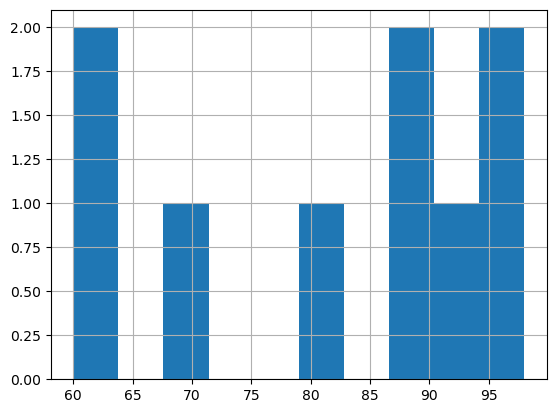

In [127]:
df.marks.hist()

subject
C         90.000000
HTML      98.000000
Java      76.666667
Python    86.333333
Name: marks, dtype: float64


<Axes: xlabel='subject'>

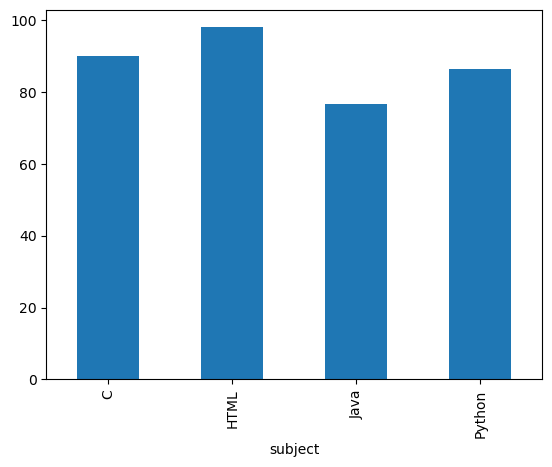

In [128]:
subgroup = df.groupby('subject')['marks'].mean()
print(subgroup)
subgroup.plot.bar()

In [134]:
studgroup = df.groupby('name')['marks'].mean()
studgroup

name
Bill       92.5
Henry      60.0
Roberts    76.0
Steve      88.0
Name: marks, dtype: float64

<AxesSubplot:ylabel='marks'>

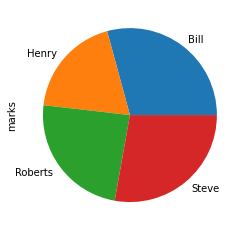

In [13]:
studgroup.plot.pie()

<AxesSubplot:xlabel='name'>

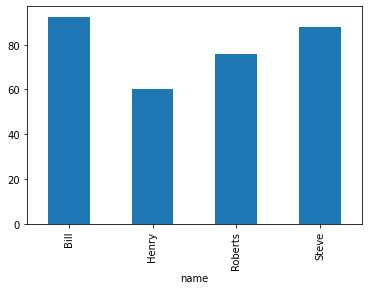

In [135]:
studgroup.plot.bar()